In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweet = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(tweet.head(5))

   Unnamed: 0  Unnamed: 0.1  id keyword location  \
0           0             0   1     NaN      NaN   
1           1             1   4     NaN      NaN   
2           2             2   5     NaN      NaN   
3           3             3   6     NaN      NaN   
4           4             4   7     NaN      NaN   

                                                text  target  
0  Our Deeds are the Reason of this earthquake Ma...       1  
1              Forest fire near La Ronge Sask Canada       1  
2  All residents asked to shelter in place are be...       1  
3  13000 people receive wildfires evacuation orde...       1  
4  Just got sent this photo from Ruby Alaska as s...       1  


Text(0, 0.5, 'samples')

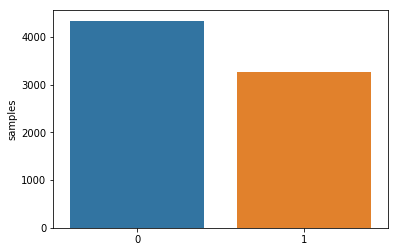

In [3]:
x = tweet.target.value_counts()
sns.barplot(x.index, x)
plt.gca().set_ylabel('samples')

In [4]:
import re
import string
from spellchecker import SpellChecker

# 拼写纠正
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

# 去除网址
def remove_url(txt):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', txt)

# 去表情包
def remove_emoji(txt):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', txt)

# 去html标记
def remove_html(txt):
    html=re.compile(r'<.*?>')
    return html.sub(r'', txt)

# 去标点
def remove_punct(txt):
    table = str.maketrans('', '', string.punctuation)
    return txt.translate(table)

In [ ]:
tweet['text'] = tweet['text'].apply(lambda x : remove_url(x))
tweet['text'] = tweet['text'].apply(lambda x : remove_emoji(x))
tweet['text'] = tweet['text'].apply(lambda x : remove_html(x))
tweet['text'] = tweet['text'].apply(lambda x : remove_punct(x))
# tweet['text'] = tweet['text'].apply(lambda x : correct_spellings(x))
test['text'] = test['text'].apply(lambda x : remove_url(x))
test['text'] = test['text'].apply(lambda x : remove_emoji(x))
test['text'] = test['text'].apply(lambda x : remove_html(x))
test['text'] = test['text'].apply(lambda x : remove_punct(x))
# test['text'] = test['text'].apply(lambda x : correct_spellings(x))
print(tweet.head(10))

In [4]:
from nltk.corpus import stopwords
from nltk.util import ngrams
from gensim.parsing.preprocessing import remove_stopwords

# 去除停用词 gensim 去除停用词不需要分词
def remove_stop(txt):
    res = remove_stopwords(txt)
    return res

In [6]:
tweet['text'] = tweet['text'].apply(lambda x : remove_stopwords(x))
test['text'] = test['text'].apply(lambda x : remove_stopwords(x))

In [16]:
def remove_huanhang(text):
    txt = ""
    for ch in text:
        if ch == '\n':
            ch = ' '
        txt += ch
    return txt

In [18]:
tweet['text'] = tweet['text'].apply(lambda x : remove_huanhang(x))
test['text'] = test['text'].apply(lambda x : remove_huanhang(x))

In [7]:
tweet.to_csv('train.csv')
test.to_csv('test.csv')